<a href="https://colab.research.google.com/github/isaac030/orchestrating-workflows-for-genai-deeplearning-ai/blob/main/TSA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima.model import ARIMA

In [ ]:
#Create a time series data
data = {
    'Month' : pd.date_range(start='2023-01-01', periods=24, freq='M'),
    'Sales' : [200,220,250,270,300,310,330,350,380,400,430,450,
               470,500,520,530,540,570,590,600,620,640,660,680]
}

df = pd.DataFrame(data)
df.set_index('Month', inplace=True)
df.head()

/tmp/ipython-input-3-386063493.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  'Month' : pd.date_range(start='2023-01-01', periods=24, freq='M'),


,Sales
Month,
2023-01-31,200
2023-02-28,220
2023-03-31,250
2023-04-30,270
2023-05-31,300


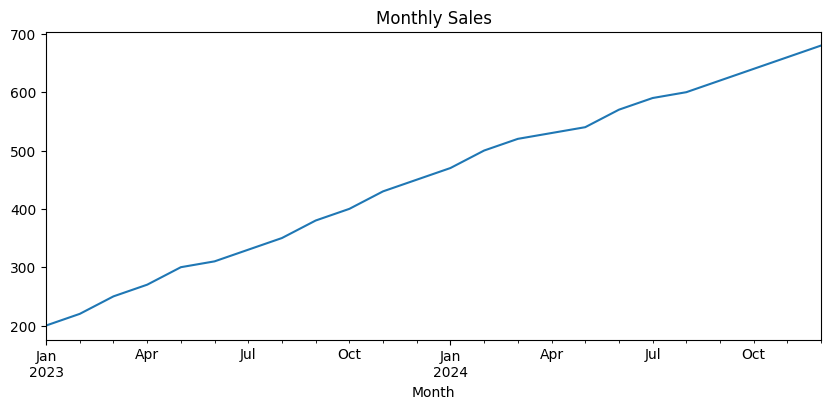

In [ ]:
#Plot the data
df['Sales'].plot(figsize = (10,4),title='Monthly Sales')
plt.show()

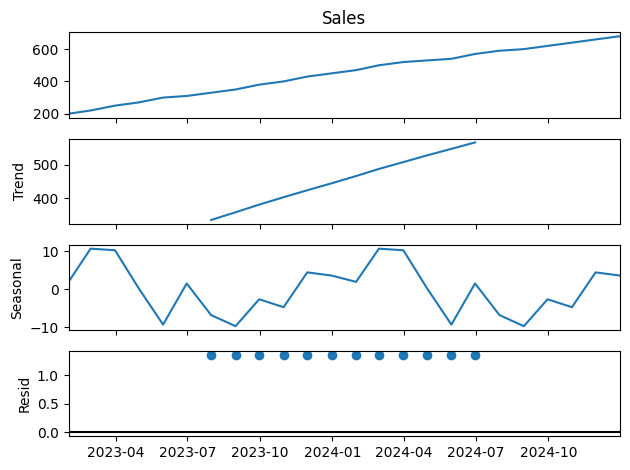

In [ ]:
#Decompose the time series
result = seasonal_decompose(df['Sales'], model='additive', period=12)
result.plot()
plt.show()

In [ ]:
#ADF test
result_adf = adfuller(df['Sales'])
print('ADF Statistic : ',result_adf[0])
print('p-value : ',result_adf[1])   #if p < 0.05 data is stationary

ADF Statistic :  -11.103936258916587
p-value :  3.804182807414143e-20


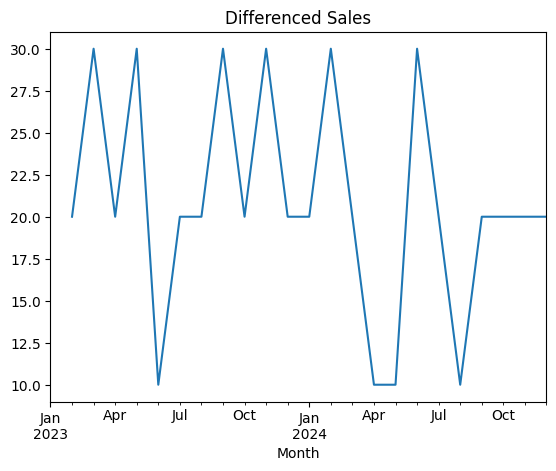

In [ ]:
#convert it to stationary
df['Sales_diff'] = df['Sales'].diff().dropna()
df['Sales_diff'].plot(title = 'Differenced Sales')
plt.show()

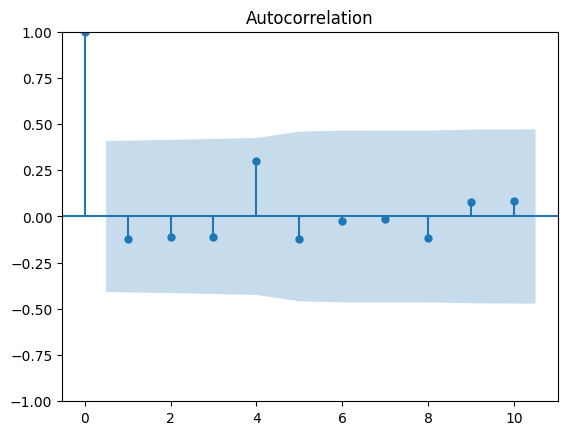

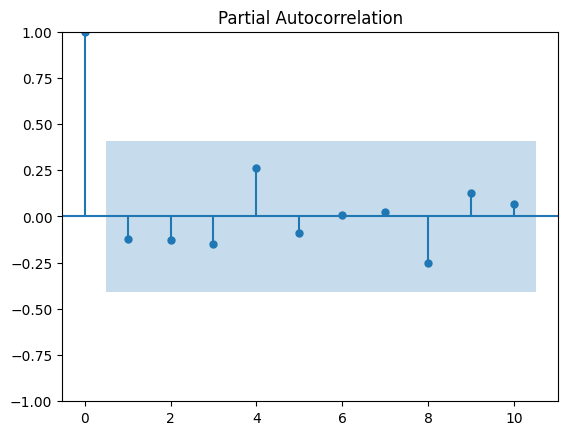

In [ ]:
#ACF and PACF
plot_acf(df['Sales_diff'].dropna(),lags=10)
plt.show()

plot_pacf(df['Sales_diff'].dropna(),lags=10)
plt.show()

In [ ]:
#ARIMA
model = ARIMA(df['Sales'], order=(1,1,1))
model_fit = model.fit()
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency ME will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Sales   No. Observations:                   24
Model:                 ARIMA(1, 1, 1)   Log Likelihood                 -79.022
Date:                Thu, 19 Jun 2025   AIC                            164.044
Time:                        14:47:05   BIC                            167.450
Sample:                    01-31-2023   HQIC                           164.900
                         - 12-31-2024                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9999      0.002    520.403      0.000       0.996       1.004
ma.L1         -0.9506      0.357     -2.660      0.008      -1.651      -0.250
sigma2        46.4902     19.225      2.418      0.0

In [ ]:
#Forecast future values
forecast = model_fit.forecast(steps=12)
print(forecast)

2025-01-31    700.486393
2025-02-28    720.970114
2025-03-31    741.451164
2025-04-30    761.929542
2025-05-31    782.405250
2025-06-30    802.878288
2025-07-31    823.348656
2025-08-31    843.816354
2025-09-30    864.281383
2025-10-31    884.743743
2025-11-30    905.203435
2025-12-31    925.660458
Freq: ME, Name: predicted_mean, dtype: float64


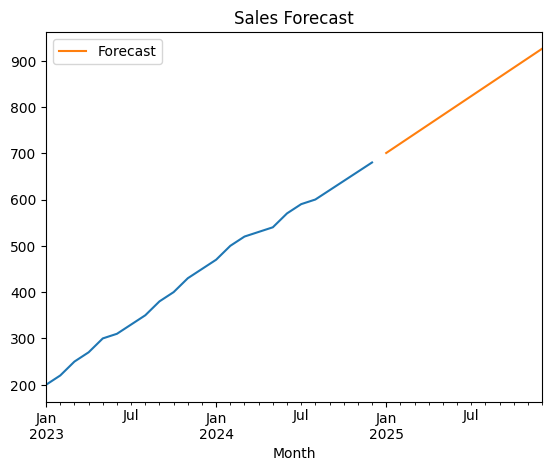

In [ ]:
#Plot the forecast
df['Sales'].plot(label='Past')
forecast.plot(label = 'Forecast',legend=True)
plt.title('Sales Forecast')
plt.show()